In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("./files/Aquifer_Petrignano.csv")
df.index = pd.to_datetime(df.Date, format = '%d/%m/%Y', )
df = df.drop(['Date'], axis=1)

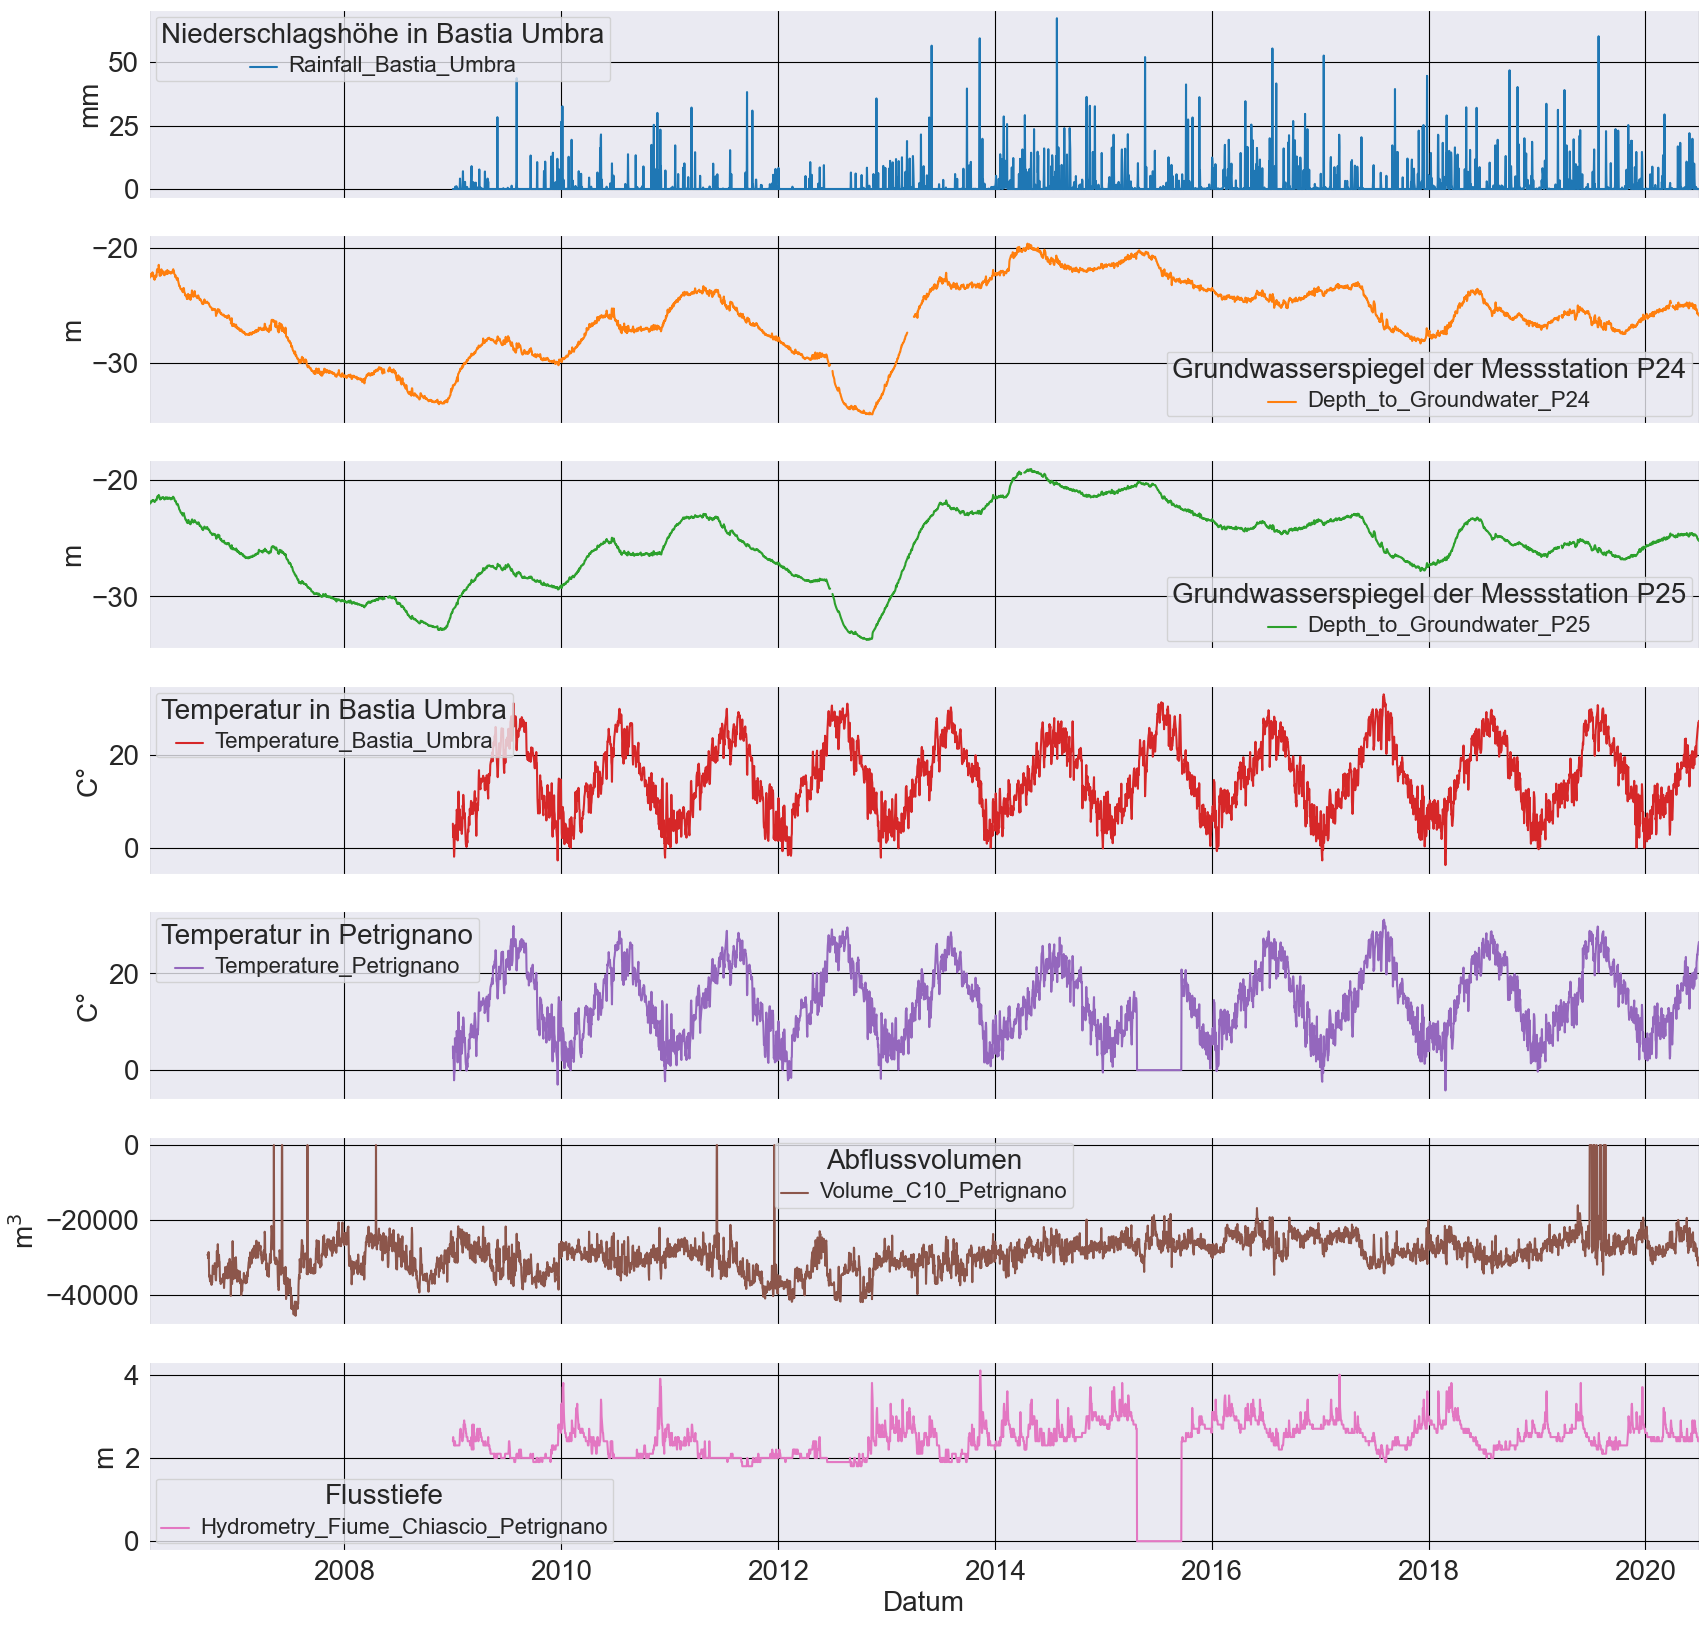

In [3]:
from matplotlib import pyplot as plt

subplots = df.plot(subplots=True, figsize=(20, 20))
y_labels = ['mm', 'm', 'm', 'C°', 'C°', 'm$^3$', 'm']
legend_titles = ['Niederschlagshöhe in Bastia Umbra', 'Grundwasserspiegel der Messstation P24', 'Grundwasserspiegel der Messstation P25', 'Temperatur in Bastia Umbra', 'Temperatur in Petrignano', 'Abflussvolumen', 'Flusstiefe']
for i, ax in enumerate(subplots):
    ax.set_xlabel("Datum", fontsize=20)  # Change 'X Label' to your desired label
    ax.set_ylabel(y_labels[i], fontsize=20)  # Change 'Y Label' to your desired label
    ax.tick_params(axis='both', which='major', labelsize=20, grid_color='k')
    # Adjust font size for legend
    legend = ax.legend()
    if legend:
        legend.set_title(legend_titles[i], prop={'size': 20})  # Change 'Legend' to your desired legend title
        for text in legend.texts:
            text.set_fontsize(16)
#plt.savefig('graphs/rawdata.png', format='png', transparent=True)

In [4]:
df.describe()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
std,5.217923,3.319858,3.214165,7.794871,7.701369,4751.864371,0.589088
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.250000,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,0.000000,-25.990000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,67.300000,-19.660000,-19.100000,33.000000,31.100000,0.000000,4.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  4199 non-null   datetime64[ns]
 1   Rainfall              4199 non-null   float64       
 2   Depth_to_Groundwater  4172 non-null   float64       
 3   Temperature           4199 non-null   float64       
 4   Drainage_Volume       4198 non-null   float64       
 5   River_Hydrometry      4199 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 197.0 KB


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

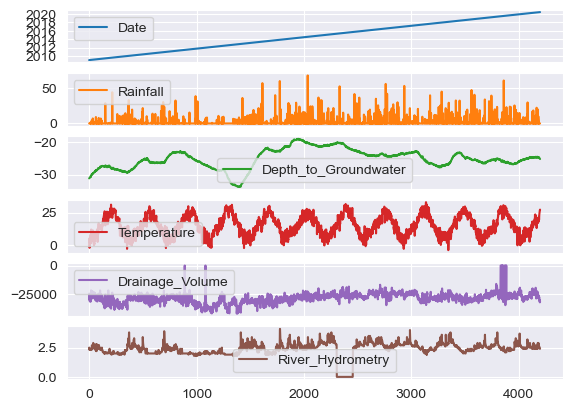

In [7]:
df.plot(subplots=True)

In [8]:
df[df.isna().any(axis=1)]

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
1272,2012-06-26,0.0,NaN,26.5,-35335.872,1.9
1273,2012-06-27,0.0,NaN,27.7,-36835.776,1.9
1274,2012-06-28,0.0,NaN,28.3,-37066.464,1.9
1275,2012-06-29,0.0,NaN,29.3,-36822.816,1.9
1276,2012-06-30,0.0,NaN,29.9,-37361.952,1.9
1277,2012-07-01,0.0,NaN,30.6,-37361.952,1.9
1278,2012-07-02,0.0,NaN,29.5,-37018.944,1.9
1916,2014-04-01,0.0,NaN,12.8,-28770.336,2.5
1917,2014-04-02,0.0,NaN,13.2,-31332.096,2.5
1918,2014-04-03,0.0,NaN,13.6,-31230.144,2.5


In [9]:
df[df['Drainage_Volume'] == 0]

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
889,2011-06-09,0.2,-23.24,19.2,0.0,2.0
890,2011-06-10,0.0,-23.28,19.1,0.0,2.0
1083,2011-12-20,0.0,-27.11,1.9,0.0,2.0
3830,2019-06-28,0.0,-25.55,29.7,0.0,2.4
3831,2019-06-29,0.0,-25.66,27.8,0.0,2.4
3832,2019-06-30,0.0,-25.71,27.1,0.0,2.4
3833,2019-07-01,0.0,-25.73,28.7,0.0,2.4
3834,2019-07-02,0.0,-25.74,29.3,0.0,2.4
3835,2019-07-03,0.0,-25.82,29.8,0.0,2.4
3836,2019-07-04,0.0,-26.00,29.0,0.0,2.3


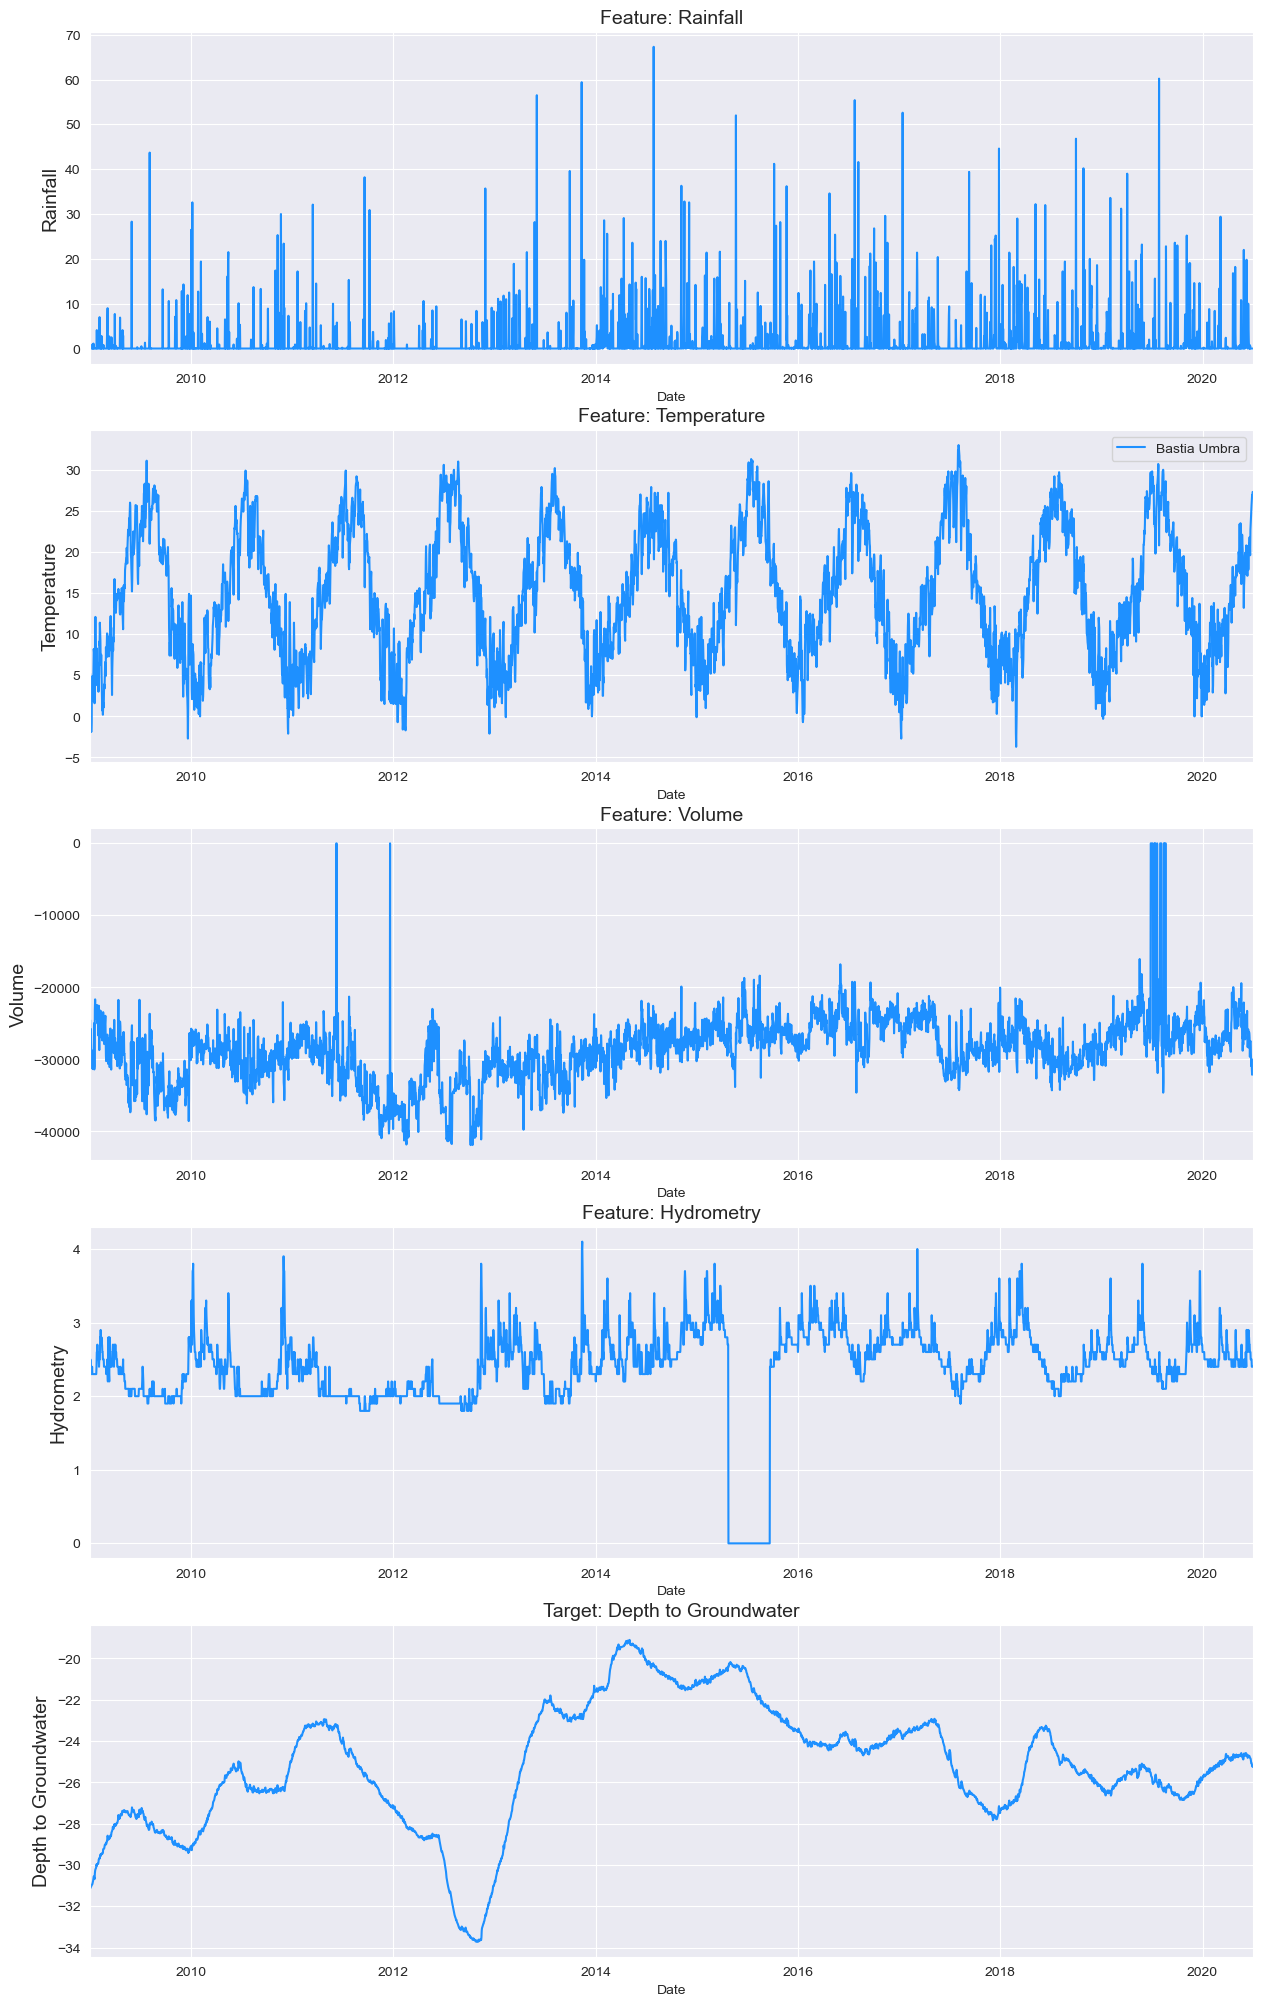

In [2]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

sns.lineplot(x=df.Date, y=df.Rainfall.fillna(np.inf), ax=ax[0], color='dodgerblue')
ax[0].set_title('Feature: Rainfall', fontsize=14)
ax[0].set_ylabel(ylabel='Rainfall', fontsize=14)


sns.lineplot(x=df.Date, y=df.Temperature.fillna(np.inf), ax=ax[1], color='dodgerblue',label='Bastia Umbra')
ax[1].set_title('Feature: Temperature', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)


sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[2], color='dodgerblue')
ax[2].set_title('Feature: Volume', fontsize=14)
ax[2].set_ylabel(ylabel='Volume', fontsize=14)


sns.lineplot(x=df.Date, y=df.River_Hydrometry.fillna(np.inf), ax=ax[3], color='dodgerblue')
ax[3].set_title('Feature: Hydrometry', fontsize=14)
ax[3].set_ylabel(ylabel='Hydrometry', fontsize=14)


sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater.fillna(np.inf), ax=ax[4], color='dodgerblue')
ax[4].set_title('Target: Depth to Groundwater', fontsize=14)
ax[4].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)


for i in range(5):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.show()

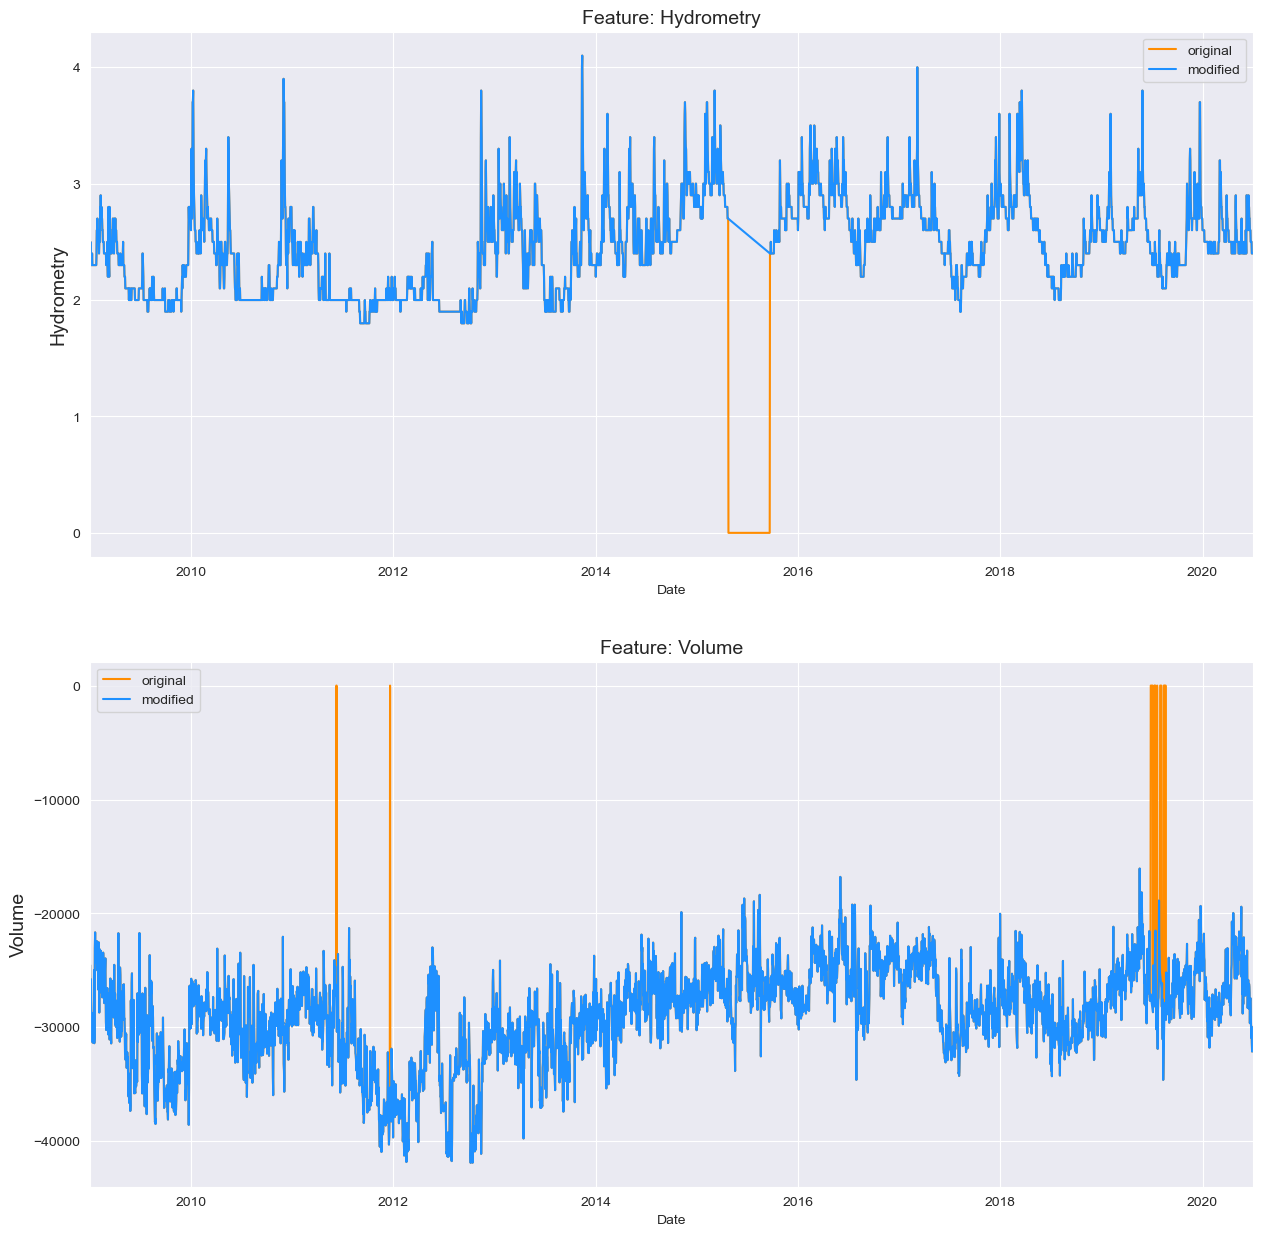

In [3]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
old = df.River_Hydrometry.copy()
df['River_Hydrometry'] = np.where((df.River_Hydrometry == 0),np.nan, df.River_Hydrometry)

sns.lineplot(x=df.Date, y=old.fillna(np.inf), ax=ax[0], color='darkorange', label = 'original')
sns.lineplot(x=df.Date, y=df.River_Hydrometry.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)

old = df.Drainage_Volume.copy()
df['Drainage_Volume'] = np.where((df.Drainage_Volume == 0),np.nan, df.Drainage_Volume)

sns.lineplot(x=df.Date, y=old.fillna(np.inf), ax=ax[1], color='darkorange', label = 'original')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'modified')
ax[1].set_title('Feature: Volume', fontsize=14)
ax[1].set_ylabel(ylabel='Volume', fontsize=14)


for i in range(2):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.show()

In [8]:
df = pd.read_csv("./files/scaled_m.csv", index_col=0)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')
saved_df = pd.read_csv("././predictions/LSTM/5.csv", index_col=0)
saved_df.index = pd.to_datetime(saved_df.index, format = '%Y-%m-%d')

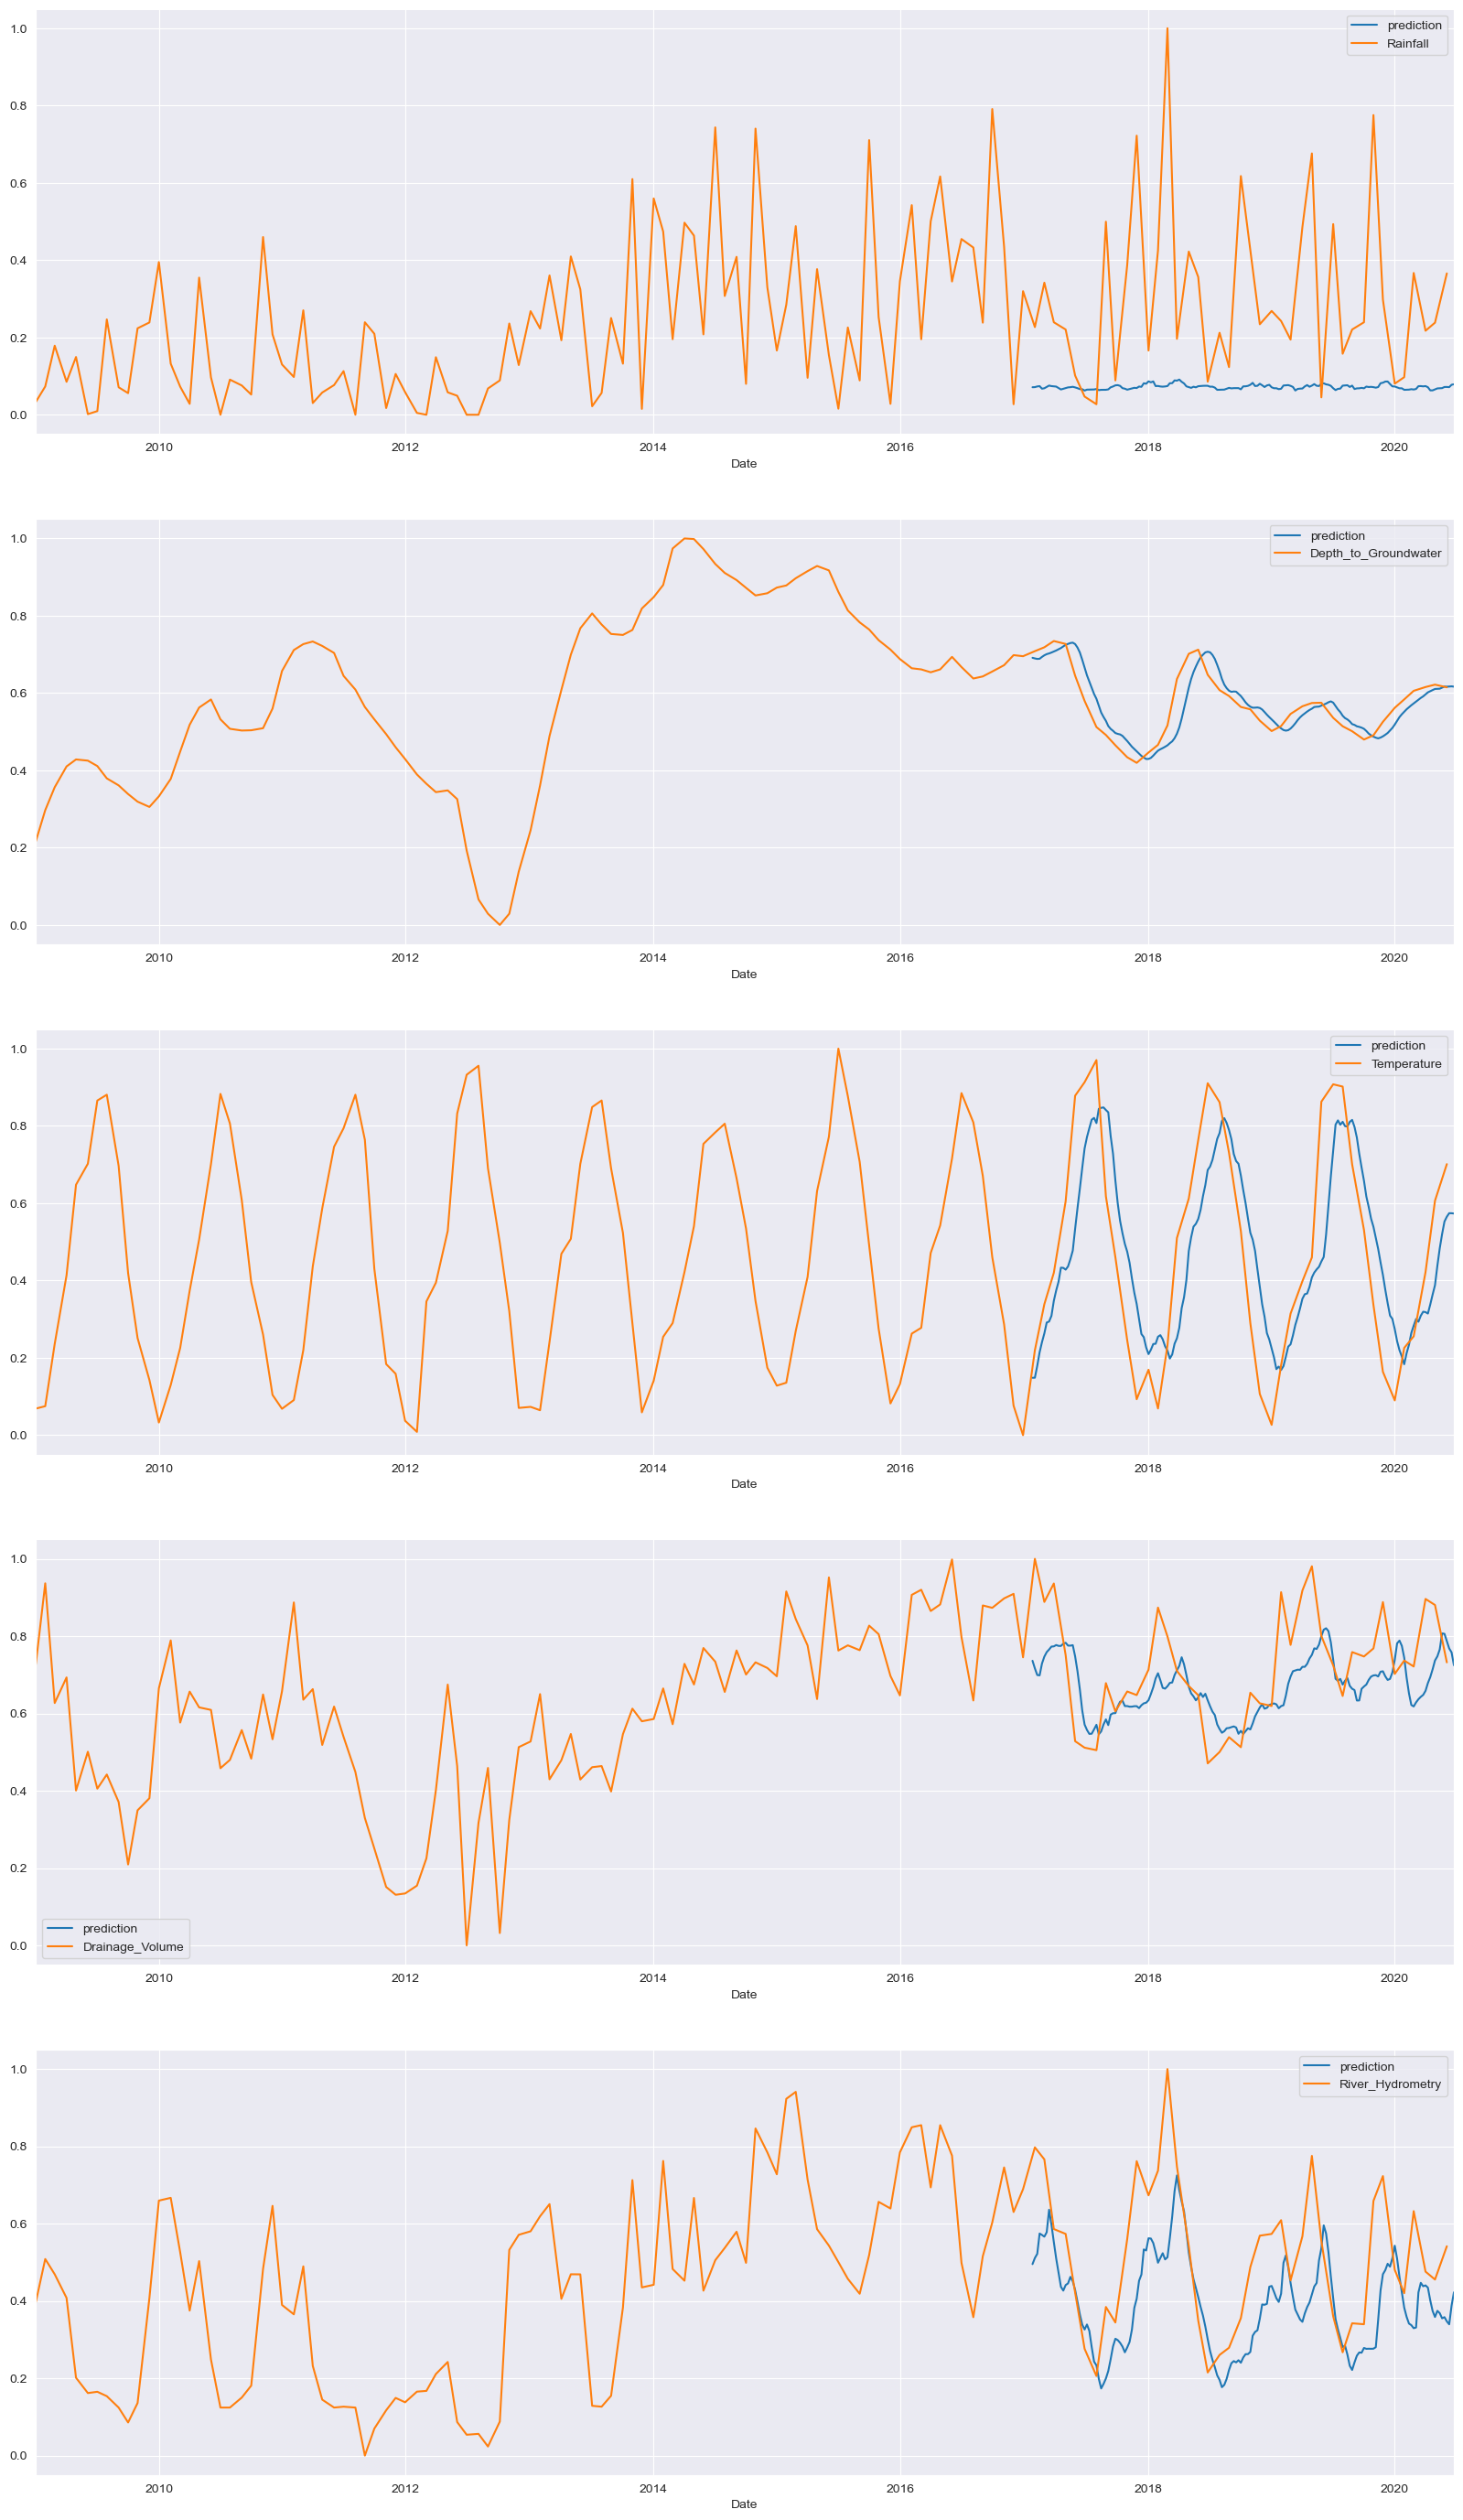

In [9]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(20, 35))
for i in range(5):
    saved_df.iloc[-1000:,i].plot(ax = ax[i], label='prediction', legend=True)
    df.iloc[-1000:,i].plot(ax = ax[i], legend=True)
plt.show()